# Qualico 2023

In [1]:
import dhlab as dh
import pandas as pd
import os
import json
import dhlab.graph_networkx_louvain as gnl
import networkx as nx

dh.css()

In [2]:
files = !ls json2

In [3]:
filelist = [os.path.join("json2", f) for f in files if "_en" in f]
filelist

['json2/cze_results2_en.json',
 'json2/de_results2_en.json',
 'json2/fi_results2_en.json',
 'json2/no_results2_en.json',
 'json2/pl_results2_en.json']

In [4]:
topics = {}
for f in filelist:
    lang = f.split('/')[1].split('.json')[0].split('_')[0]
    with open(f) as fp:
        topics[lang] = json.load(fp)
    

In [5]:
topic_lang = {}
for lang in topics:
    for top in topics[lang]:
        topic_lang[f"{lang}_{top}"] = topics[lang][top]

In [6]:
dfs = []
for tl in topic_lang:
    df = pd.DataFrame(topic_lang[tl])
    df[tl] = 1
    dfs.append(df)

In [7]:
dtm = pd.concat([df.drop_duplicates().set_index(0) for df in dfs], axis = 1).fillna(0)

In [38]:
d = dtm.copy()

In [39]:
d.columns = [x[:7] for x in d.columns]

In [47]:
d['sums'] = d.sum(axis = 1)

In [50]:
from random import sample


In [54]:
sample(list(d.columns[:-1]),10)

['fi_spec',
 'no_reli',
 'cze_mor',
 'fi_comp',
 'de_comp',
 'de_trip',
 'no_spec',
 'fi_mora',
 'pl_lite',
 'fi_reli']

In [56]:
d[['sums'] + sample(list(d.columns[:-1]),15)].sample(20).style.format(precision=0).background_gradient()

,sums,no_hist,cze_sla,no_meta,de_mora,de_lite,no_trav,no_slav,fi_spec,de_meta,no_spec,fi_reli,pl_slav,fi_lite,fi_hist,cze_com
0,,,,,,,,,,,,,,,,
crime,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
bardo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
online,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
day,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
support,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
java,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
picture,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
meditationes,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
computing,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
words = dtm.sum(axis = 1).sort_values(ascending = False)

In [9]:
words[words > 10]

0
world            21.0
life             18.0
philosophy       17.0
book             16.0
science          16.0
man              15.0
work             15.0
word             14.0
human            12.0
culture          12.0
history          11.0
study            11.0
philosophical    11.0
of               11.0
year             11.0
dtype: float64

In [31]:
small_dtm = dtm.loc[words[words > 0].index]

In [32]:
adj = small_dtm.transpose().dot(small_dtm)

In [59]:
adj.sort_values(by='cze_history', ascending=False).style.format(precision=0).background_gradient()

,cze_religion,cze_mathematics,cze_history,cze_travel,cze_literature of languages,cze_computer science,cze_metaphysics,cze_moral philosophy,cze_special metaphysics,cze_slavers,de_literature of languages,de_mathematics,de_History,de_trip,de_computer science,de_religion,de_special metaphysics,de_metaphysics,de_moral philosophy,de_slavery,fi_metaphysics,fi_computer science,fi_moral philosophy,fi_mathematics,fi_religion,fi_history,fi_travel,fi_slavery,fi_special metaphysics,fi_literature of languages,no_literature of languages,no_history,no_computer science,no_moral philosophy,no_mathematics,no_religion,no_travel,no_special metaphysics,no_slavery,no_metaphysics,pl_history,pl_literature of languages,pl_moral philosophy,pl_computer science,pl_mathematics,pl_religion,pl_travel,pl_metaphysics,pl_special metaphysics,pl_slavers
cze_history,5,5,95,6,10,1,1,2,3,5,6,2,24,3,2,6,0,0,0,5,2,2,2,3,4,12,0,3,0,0,3,10,0,3,1,1,1,1,2,2,30,6,3,0,3,3,3,1,3,6
pl_history,6,4,30,6,7,3,1,6,4,3,7,1,21,4,2,5,1,0,2,5,3,3,4,1,6,12,0,3,0,0,6,11,0,4,0,4,3,2,5,1,96,11,7,2,4,14,3,2,6,6
de_History,8,5,24,3,6,2,2,1,2,4,13,4,93,5,2,8,5,0,1,5,3,4,1,2,8,11,0,1,0,0,2,10,2,7,0,6,0,2,5,4,21,4,3,0,4,9,2,4,6,4
fi_history,7,9,12,4,5,0,2,4,4,1,6,3,11,5,2,2,2,0,0,2,5,1,6,11,4,95,1,1,0,0,3,9,1,2,3,2,4,0,3,2,12,7,4,1,6,5,4,2,3,2
cze_literature of languages,10,3,10,7,83,2,1,10,4,3,29,0,6,3,1,6,2,0,2,2,2,3,15,1,3,5,1,2,0,0,31,5,2,4,0,1,2,1,2,3,7,38,3,2,1,7,4,2,3,1
no_history,4,2,10,5,5,1,1,3,3,1,3,1,10,5,1,3,1,0,0,5,0,0,2,0,2,9,1,2,0,0,3,96,2,3,0,5,4,1,3,3,11,3,3,0,1,4,4,2,2,1
de_literature of languages,17,3,6,6,29,2,3,12,7,3,100,2,13,5,3,10,3,0,1,3,5,3,16,3,5,6,2,2,0,0,33,3,1,3,0,1,2,2,1,5,7,28,2,1,1,7,5,5,6,5
pl_literature of languages,15,5,6,8,38,3,0,14,7,5,28,0,4,5,1,9,2,0,2,3,6,4,17,1,4,7,1,0,0,0,26,3,1,2,0,2,4,2,2,2,11,97,6,3,1,14,5,2,5,3
de_religion,31,3,6,3,6,3,2,17,10,0,10,3,8,2,4,91,9,3,1,5,8,5,12,5,4,2,0,0,0,0,8,3,1,4,0,10,1,5,0,10,5,9,3,1,1,17,1,6,11,4
pl_slavers,3,0,6,2,1,0,2,2,2,9,5,0,4,4,0,4,3,2,0,7,4,0,3,0,0,2,0,1,0,0,3,1,0,1,1,0,1,3,9,1,6,3,2,0,2,3,4,4,6,94


In [33]:
G = nx.from_pandas_adjacency(adj)

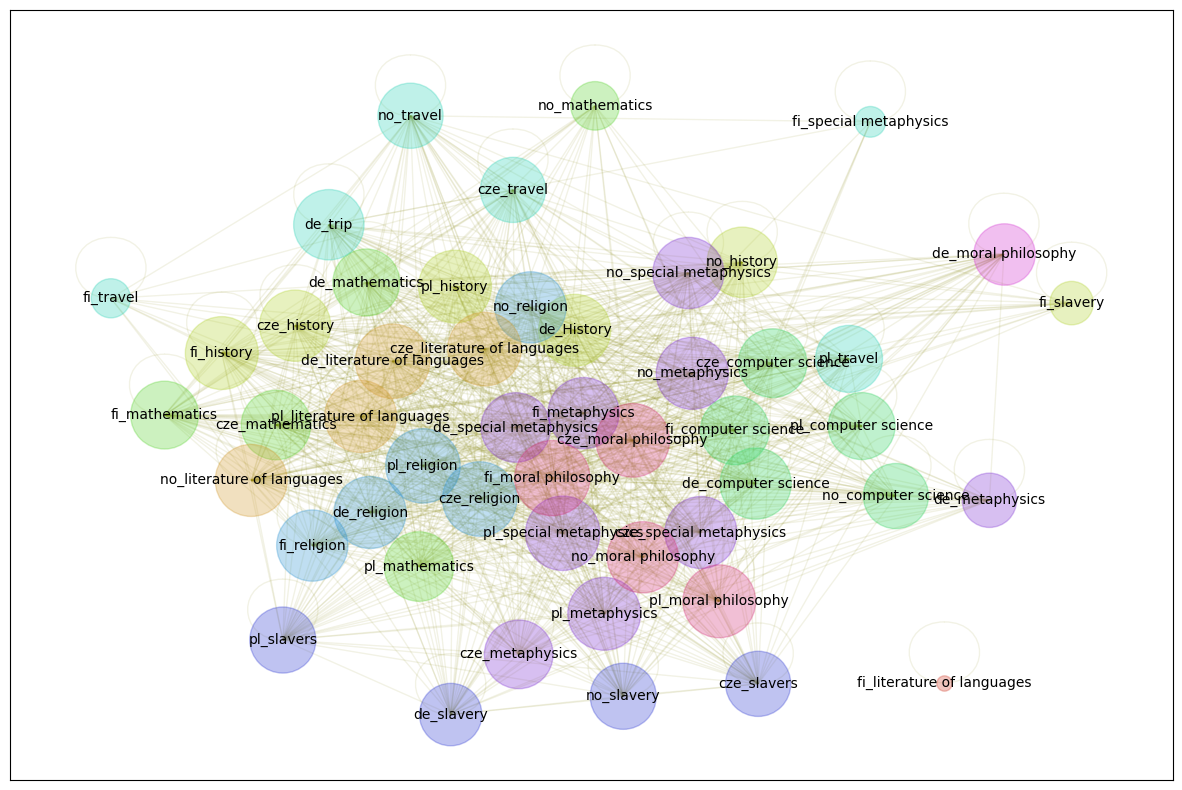

In [37]:
gnl.show_graph(G, spread = 3.5)

In [35]:
gnl.show_communities(G)

pl_history-fi_history :  pl_history, fi_history, de_History, cze_history, no_history, fi_slavery

cze_mathematics-pl_mathematics :  cze_mathematics, pl_mathematics, fi_mathematics, de_mathematics, no_mathematics

de_computer science-fi_computer science :  de_computer science, fi_computer science, cze_computer science, pl_computer science, no_computer science

de_trip-pl_travel :  de_trip, pl_travel, cze_travel, no_travel, fi_travel, fi_special metaphysics

cze_religion-pl_religion :  cze_religion, pl_religion, de_religion, no_religion, fi_religion

no_slavery-pl_slavers :  no_slavery, pl_slavers, cze_slavers, de_slavery

pl_special metaphysics-pl_metaphysics :  pl_special metaphysics, pl_metaphysics, cze_special metaphysics, no_metaphysics, fi_metaphysics, no_special metaphysics, de_special metaphysics, cze_metaphysics, de_metaphysics

de_moral philosophy :  de_moral philosophy

fi_moral philosophy-cze_moral philosophy :  fi_moral philosophy, cze_moral philosophy, pl_moral philosophy, 